In [2]:
using PyCall
matplotlib = pyimport("matplotlib")
PyDict(matplotlib["rcParams"])["figure.figsize"] = (10, 5)
using PyPlot

In [4]:
using WAV
using Images
using Color
using FixedPointNumbers
using ImageView

In [5]:
# SpeechBase は、今のところ名前に見合ったパッケージではないため、いずれ消す（or どこかにマージする）可能性があります
# この例では、短時間フーリエ変換、逆短時間フーリエ変換のために使います。
# Pkg.clone("https://github.com/r9y9/SpeechBase.jl") としてインストールしてください
using SpeechBase

In [6]:
function add_rgba_img(H, img, r=2.0)
    w, h = size(img)
    Y = copy(H)
    for j=1:w, i=1:h
        Y[i,j] = Y[i,j] + r * img[j,h+1-i].c.r * img[j,h+1-i].alpha
    end
    Y
end

add_rgba_img (generic function with 2 methods)

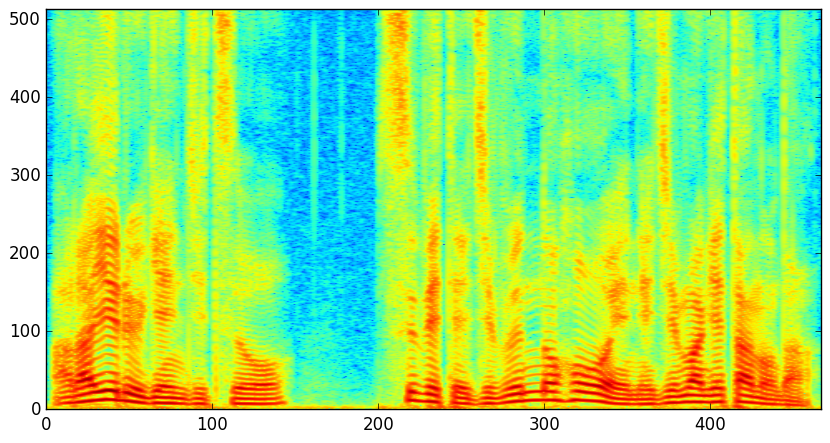

PyObject <matplotlib.image.AxesImage object at 0x10f973090>

In [7]:
x, fs = wavread("test_files/test16k.wav")
x, fs = convert(Vector{Float64}, vec(x)), convert(Int, fs)

framelen = 1024
hopsize = div(framelen, 8)

X = stft(x, framelen, hopsize, blackman(framelen))
H, P = abs(X), angle(X);

imshow(log(H), origin="lower", aspect="auto")
# colorbar()

size(X) => (513,467)
size(img) => (467,513)


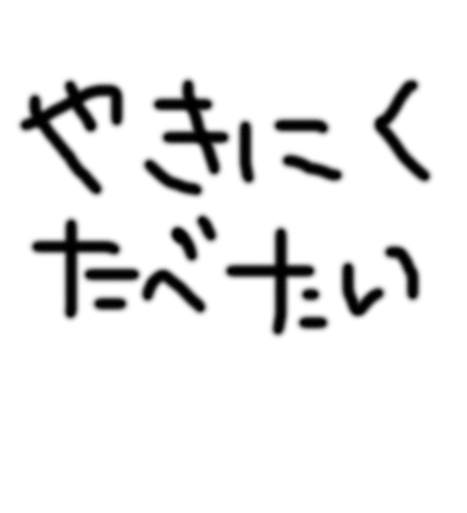

In [8]:
img = imread("test_files/yakiniku.png")

@show size(X)
@show size(img)

img

In [9]:
data(img)

467x513 Array{AlphaColorValue{RGB{UfixedBase{Uint8,8}},UfixedBase{Uint8,8}},2}:
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)  …  RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)  …  RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)  …  RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 RGBA{Ufixed8}(1.0,1.0,1.0,0.0)     RGBA{Ufixed8}(1.0,1.0,1.0,0.0)
 ⋮                               ⋱               

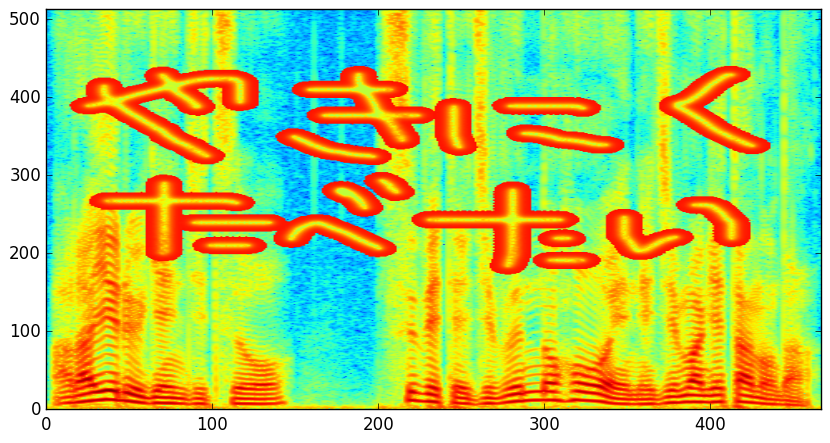

PyObject <matplotlib.image.AxesImage object at 0x118a22890>

In [10]:
# 重ねる
Y = add_rgba_img(H, img, 10.5)
imshow(log(Y), origin="lower", aspect="auto")
# colorbar()

In [11]:
# 時間領域に戻す
# y = istft(Y .* exp(im * P), framelen, hopsize)
# wavwrite(float(x), "yakiniku16k.wav", Fs=fs)

size(X) => (513,467)
size(img) => (467,513)


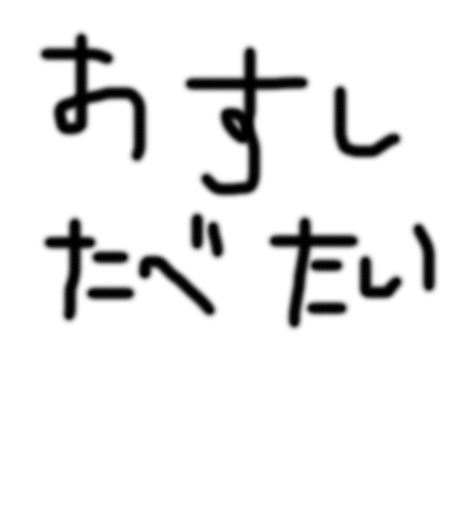

In [12]:
img = imread("test_files/sushi.png")

@show size(X)
@show size(img)

img

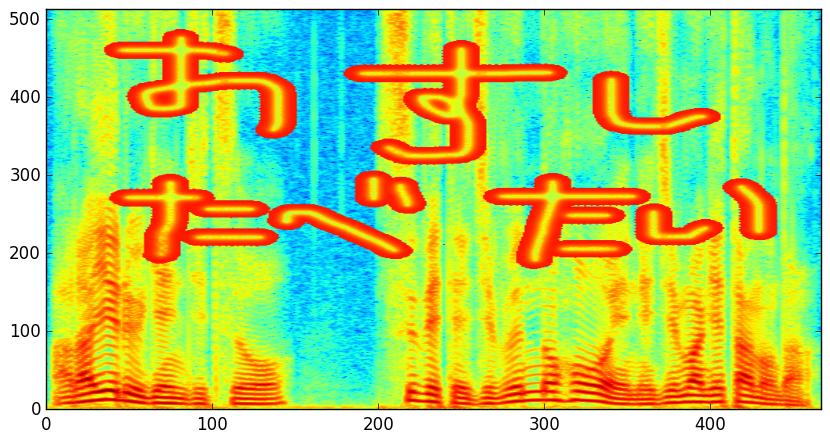

PyObject <matplotlib.image.AxesImage object at 0x118991a90>

In [13]:
# 重ねる
Y = add_rgba_img(H, img, 10.0)
imshow(log(Y), origin="lower", aspect="auto")
# colorbar()